# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Della Shanda Anggrivani
- **Email:** m200d4kx1458@bangkit.academy
- **ID Dicoding:** della_shanda_anggrivani_yd4I

## Menentukan Pertanyaan Bisnis

- Apa hubungan antara cuaca dengan jumlah penyewaan sepeda?
- Pada jam berapa terjadi penyewaan sepeda terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur agar visualisasi muncul di notebook
%matplotlib inline

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mendefinisikan data day
data_day = pd.read_csv('/content/drive/MyDrive/Bangkit-ML/day.csv')
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Mendefinisikan data hour
data_hour = pd.read_csv('/content/drive/MyDrive/Bangkit-ML/hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Data Day**

In [5]:
# Menilai dataset data_day untuk masalah kualitas data
data_day.info(), data_day.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(None,
           instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
 25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
 50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
 75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
 max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   
 
        workingday  weathersit        temp       atemp         hum   windspeed  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
 std   

Dataset data_day terdiri dari 731 entri dengan 16 kolom dan tidak memiliki nilai yang hilang. Tetapi tipe data untuk kolom dteday tidak sesuai, pada data di atas tipe datanya adalah object, sehingga perlu diubah menjadi datetime.

In [6]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", data_day.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan data diatas, tidak ditemukan adanya data yang duplikat.

**Data Hour**

In [7]:
# Menilai dataset data_hour untuk masalah kualitas data
data_hour.info(), data_hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


(None,
           instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     23.000000   
 
             holiday       weekday    workingday    weathersit          temp  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       0.028770      3.003683      0.682721      1.425283      0.496987   
 std        0.167165      2.005771      0.465431 

Dataset data_day terdiri dari 17.379 entri dengan 17 kolom dan tidak memiliki nilai yang hilang. Tetapi tipe data untuk kolom dteday tidak sesuai, pada data di atas tipe datanya adalah object, sehingga perlu diubah menjadi datetime.

In [8]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", data_hour.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan data diatas, tidak ditemukan adanya data yang duplikat.

### Cleaning Data

In [9]:
# Mengubah tipe data kolom 'dteday' dari object ke datetime
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

In [10]:
# Mengecek tipe data dari data_day dan data_hour
data_day.info(), data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(None, None)

Berdasarkan info diatas dapat dilihat bahwa tipe data dari kolom dteday dari data_day dan data_hour telah berubah dari object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
# Statistik Deskriptif untuk Cuaca dan Jumlah Penyewaan Sepeda
weather_stats = data_day.groupby('weathersit')['cnt'].describe()
print(weather_stats)

            count         mean          std    min     25%     50%     75%  \
weathersit                                                                   
1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   

               max  
weathersit          
1           8714.0  
2           8362.0  
3           4639.0  


Berdasarkan statistik deskriptif:

Hubungan antara Cuaca dan Jumlah Penyewaan Sepeda:

- Cuaca Cerah (1): Rata-rata jumlah penyewaan sepeda adalah sekitar 4876 dengan rentang yang luas (standar deviasi: 1879), menunjukkan hari-hari dengan cuaca cerah cenderung memiliki jumlah penyewaan yang tinggi.

- Cuaca Mendung (2): Rata-rata jumlah penyewaan sepeda turun menjadi sekitar 4035 dengan standar deviasi 1809, menunjukkan sedikit penurunan jumlah penyewaan dibandingkan cuaca cerah.

- Cuaca Hujan Ringan (3): Rata-rata jumlah penyewaan sepeda turun drastis menjadi sekitar 1803 dengan standar deviasi 1240, menunjukkan jumlah penyewaan yang jauh lebih rendah pada hari-hari dengan cuaca buruk.

In [12]:
# Menghitung korelasi antara 'weathersit' dan 'cnt'
weather_correlation = data_day['weathersit'].corr(data_day['cnt'])
weather_correlation

-0.2973912388346637

Korelasi antara weathersit dan cnt adalah -0.297, yang menunjukkan hubungan negatif yang lemah hingga sedang. Artinya, ketika situasi cuaca memburuk (nilai weathersit meningkat), jumlah penyewaan sepeda cenderung menurun. Ini sesuai dengan intuisi bahwa cuaca yang lebih buruk mengurangi kemungkinan orang menyewa sepeda.

In [13]:
# Menghitung statistik deskriptif untuk setiap jam
hourly_rentals_stats = data_hour.groupby('hr')['cnt'].describe()

# Menemukan jam dengan rata-rata penyewaan tertinggi
peak_hour = hourly_rentals_stats['mean'].idxmax()

# Menampilkan statistik deskriptif untuk jam dengan rata-rata penyewaan tertinggi
peak_hour_stats = hourly_rentals_stats.loc[peak_hour]

hourly_rentals_stats, peak_hour_stats

(    count        mean         std   min     25%    50%     75%    max
 hr                                                                   
 0   726.0   53.898072   42.307910   2.0   25.00   40.0   69.00  283.0
 1   724.0   33.375691   33.538727   1.0   11.00   20.0   42.25  168.0
 2   715.0   22.869930   26.578642   1.0    5.00   11.0   28.50  132.0
 3   697.0   11.727403   13.239190   1.0    3.00    6.0   15.00   79.0
 4   697.0    6.352941    4.143818   1.0    3.00    6.0    8.00   28.0
 5   717.0   19.889819   13.200765   1.0    8.00   19.0   29.00   66.0
 6   725.0   76.044138   55.084348   1.0   23.00   76.0  117.00  213.0
 7   727.0  212.064649  161.441936   1.0   55.50  208.0  332.00  596.0
 8   727.0  359.011004  235.189285   5.0  131.50  385.0  559.50  839.0
 9   727.0  219.309491   93.703458  14.0  155.00  216.0  293.00  426.0
 10  727.0  173.668501  102.205413   8.0  106.00  147.0  218.00  539.0
 11  727.0  208.143054  127.495536  10.0  123.00  180.0  256.00  663.0
 12  7

Berdasarkan statistik deskriptif dari jumlah penyewaan sepeda berdasarkan jam, kita dapat melihat bahwa:

- Jam dengan rata-rata penyewaan sepeda tertinggi adalah jam 17:00 (5 sore), dengan rata-rata sekitar 461 penyewaan sepeda. Standar deviasi untuk jam ini adalah sekitar 233, menunjukkan variasi yang signifikan dalam jumlah penyewaan sepeda selama jam ini di hari yang berbeda.
- Jumlah penyewaan minimum pada jam 17:00 adalah 15, sedangkan maksimumnya adalah 976, menunjukkan adanya hari-hari dengan aktivitas penyewaan sepeda yang sangat tinggi pada jam tersebut.

Identifikasi Jam Puncak:
- Jam 17:00 menonjol sebagai jam dengan aktivitas penyewaan sepeda paling sibuk, kemungkinan besar karena bertepatan dengan jam pulang kerja, di mana banyak orang menggunakan sepeda untuk kembali ke rumah atau ke destinasi selanjutnya.

Tren Harian:
- Selain jam 17:00, jam-jam lain pada sore hari juga menunjukkan rata-rata penyewaan yang tinggi, seperti jam 18:00 dengan rata-rata sekitar 426 penyewaan sepeda. Ini menunjukkan adanya tren penyewaan sepeda yang meningkat pada sore hingga awal malam, yang kemungkinan berkaitan dengan aktivitas pulang kerja dan rekreasi sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

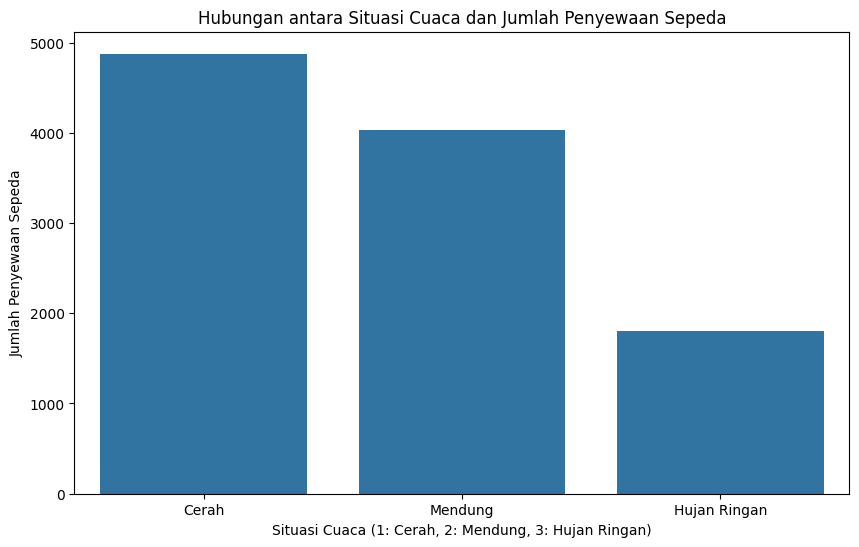

In [14]:
# Visualisasi hubungan antara cuaca dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=data_day, x='weathersit', y='cnt', errorbar=None)
plt.title('Hubungan antara Situasi Cuaca dan Jumlah Penyewaan Sepeda')
plt.xlabel('Situasi Cuaca (1: Cerah, 2: Mendung, 3: Hujan Ringan)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Mendung', 'Hujan Ringan'])
plt.show()


Dari visualisasi di atas, kita dapat melihat hubungan antara situasi cuaca dan jumlah penyewaan sepeda. Ketika cuaca cerah (1), jumlah penyewaan sepeda cenderung lebih tinggi dibandingkan dengan kondisi mendung (2) atau hujan ringan (3). Ini menunjukkan bahwa cuaca yang lebih baik cenderung mendorong lebih banyak penyewaan sepeda.

### Pertanyaan 2:

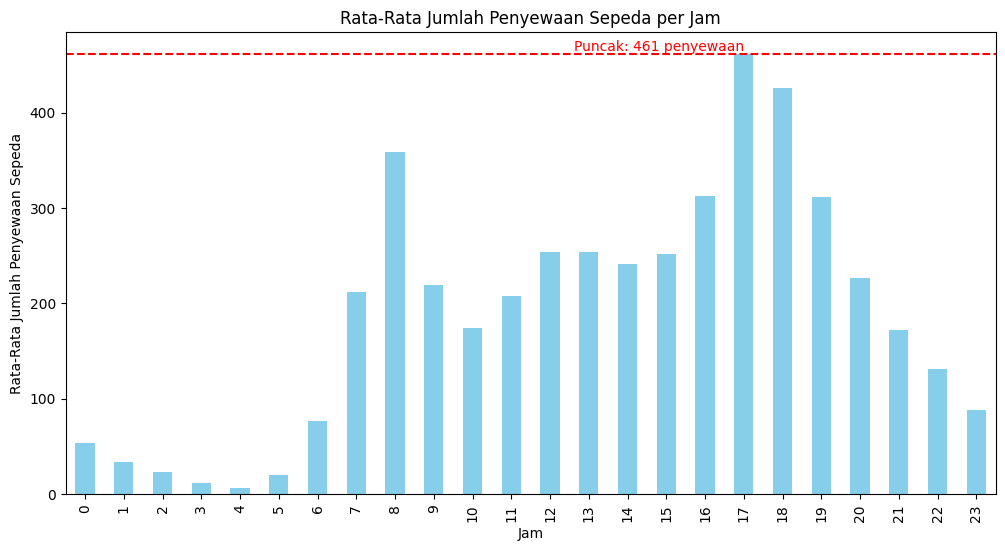

In [15]:
# Menyiapkan data untuk visualisasi
peak_rentals = hourly_rentals_stats['mean'].max()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
hourly_rentals_stats['mean'].plot(kind='bar', color='skyblue')
plt.title('Rata-Rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Jumlah Penyewaan Sepeda')
plt.axhline(y=peak_rentals, color='r', linestyle='--')
plt.text(peak_hour, peak_rentals, f'Puncak: {peak_rentals:.0f} penyewaan', color='red', va='bottom', ha='right')

plt.show()

Dari grafik, kita dapat melihat bahwa:

- Jam 17:00 (5 sore) menonjol sebagai jam dengan rata-rata penyewaan sepeda tertinggi, yang sesuai dengan analisis statistik deskriptif kita. Ini menunjukkan bahwa jam 17:00 adalah waktu puncak untuk penyewaan sepeda, kemungkinan karena bertepatan dengan waktu orang banyak pulang kerja.
- Terdapat puncak penyewaan lainnya pada jam 8 pagi, yang mungkin berkaitan dengan waktu orang berangkat kerja atau aktivitas pagi hari lainnya.
- Penyewaan sepeda cenderung meningkat mulai dari tengah hari hingga mencapai puncak pada sore hari, menunjukkan peningkatan aktivitas penyewaan sepeda selama jam-jam tersebut.

## Conclusion

- Conclution pertanyaan 1

Cuaca memiliki pengaruh yang lebih jelas dan signifikan terhadap jumlah penyewaan sepeda, dengan cuaca yang lebih baik menghasilkan jumlah penyewaan yang lebih tinggi.

- Conclution pertanyaan 2

Analisis menunjukkan bahwa jam 17:00 adalah waktu puncak untuk penyewaan sepeda, yang kemungkinan besar terkait dengan akhir jam kerja standar. Tren harian menunjukkan peningkatan aktivitas penyewaan sepeda pada sore hingga awal malam, yang mungkin mencerminkan kombinasi dari perjalanan pulang kerja dan aktivitas rekreasi.

In [20]:
# Gabungkan data_day dan data_hour
all_df = pd.concat([data_day, data_hour], ignore_index=True)

# Pastikan kolom 'dteday' di all_df masih dalam format datetime setelah penggabungan
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Simpan DataFrame gabungan ke CSV baru
all_df.to_csv('/content/drive/MyDrive/Bangkit-ML/all_data_merged.csv', index=False)

# Kode untuk mengunduh file CSV baru
# Ini hanya akan bekerja di Google Colab
from google.colab import files
files.download('/content/drive/MyDrive/Bangkit-ML/all_data_merged.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>